In [458]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
from xgboost import plot_importance
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [318]:
df = pd.read_csv('Dataset/nba.csv', index_col=0)
df.head()

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs,Year Drafted
0,Isaiah Whitehead,25,22.6,6.7,2.6,6.4,41.3,0.5,1.8,28.3,...,76.7,0.2,2.0,2.2,3.0,0.7,0.5,2.2,0,2016
1,Kris Dunn,33,16.9,4.1,1.5,4.1,37.3,0.3,0.9,29.0,...,62.5,0.4,1.9,2.2,2.4,1.0,0.3,1.2,0,2016
2,Rodney McGruder,30,25.7,5.8,2.1,5.3,40.0,0.8,2.6,32.5,...,72.4,1.5,2.0,3.5,1.5,0.7,0.3,0.7,0,2016
3,Malcolm Brogdon,32,22.9,8.3,3.2,6.9,46.2,0.9,2.1,44.1,...,85.7,0.4,2.1,2.5,3.6,1.0,0.1,1.5,0,2016
4,Malcolm Delaney,33,16.4,5.3,2.0,5.3,37.1,0.2,1.4,17.4,...,86.0,0.2,1.5,1.6,2.8,0.4,0.0,1.5,0,2016


In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 0 to 1327
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1328 non-null   object 
 1   gp            1328 non-null   int64  
 2   min           1328 non-null   float64
 3   pts           1328 non-null   float64
 4   fgm           1328 non-null   float64
 5   fga           1328 non-null   float64
 6   fg            1328 non-null   float64
 7   3p_made       1328 non-null   float64
 8   3pa           1328 non-null   float64
 9   3p            1328 non-null   float64
 10  ftm           1328 non-null   float64
 11  fta           1328 non-null   float64
 12  ft            1328 non-null   float64
 13  oreb          1328 non-null   float64
 14  dreb          1328 non-null   float64
 15  reb           1328 non-null   float64
 16  ast           1328 non-null   float64
 17  stl           1328 non-null   float64
 18  blk           1328 non-null 

In [320]:
df.describe()

,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,ftm,...,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs,Year Drafted
count,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,...,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000,1328.000000
mean,60.149096,17.430723,6.676581,2.580572,5.788780,44.105723,0.243901,0.768825,19.012425,1.274172,...,70.204066,0.998117,1.996009,2.993298,1.524925,0.610542,0.359864,1.172289,0.617470,1996.637801
std,17.341998,8.266768,4.224217,1.638193,3.521862,6.108918,0.379575,1.047230,16.112813,0.939586,...,10.600049,0.771851,1.325613,2.018496,1.435959,0.399220,0.397667,0.696530,0.486188,10.436400
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000,1980.000000
25%,47.000000,10.600000,3.600000,1.400000,3.200000,40.100000,0.000000,0.000000,0.000000,0.600000,...,64.600000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000,1988.000000
50%,62.000000,15.950000,5.400000,2.100000,4.700000,44.100000,0.100000,0.300000,22.200000,1.000000,...,71.200000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000,1995.000000
75%,77.000000,22.700000,8.700000,3.400000,7.425000,47.800000,0.400000,1.200000,32.325000,1.600000,...,77.425000,1.400000,2.600000,3.900000,1.900000,0.800000,0.500000,1.500000,1.000000,2006.000000
max,82.000000,40.900000,23.700000,9.800000,19.700000,73.700000,2.300000,6.500000,100.000000,6.000000,...,100.000000,5.300000,8.800000,12.300000,10.600000,2.500000,3.400000,4.200000,1.000000,2016.000000


In [321]:
duplicates = df[df['name'].duplicated()]
duplicates

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs,Year Drafted
119,Jeff Taylor,44,17.6,3.6,1.5,3.6,40.0,0.0,0.0,0.0,...,65.2,0.6,1.2,1.8,2.5,0.9,0.3,1.4,0,2012
225,James Johnson,65,11.6,3.9,1.5,3.2,45.2,0.2,0.7,32.6,...,72.9,0.5,1.4,2.0,0.7,0.3,0.7,0.9,1,2009
227,Gerald Henderson,43,8.3,2.6,0.9,2.4,35.6,0.1,0.4,21.1,...,74.5,0.3,0.9,1.3,0.3,0.2,0.2,0.3,1,2009
312,Marcus Williams,79,16.6,6.8,2.6,6.7,39.5,0.6,2.1,28.2,...,84.7,0.4,1.7,2.1,3.3,0.4,0.0,1.8,0,2006
313,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,...,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,Jeff Taylor,77,19.6,6.1,2.2,5.2,43.1,0.7,2.0,34.4,...,72.8,0.7,1.3,1.9,0.8,0.6,0.2,0.6,0,1982
1211,Jeff Taylor,44,17.6,3.6,1.5,3.6,40.0,0.0,0.0,0.0,...,65.2,0.6,1.2,1.8,2.5,0.9,0.3,1.4,0,1982
1227,Walker Russell,68,11.1,2.7,1.0,2.7,36.4,0.0,0.3,11.1,...,81.0,0.3,0.8,1.1,1.9,0.2,0.0,1.4,0,1982
1284,Eddie Johnson,74,20.5,9.3,4.0,8.7,45.9,0.0,0.1,9.1,...,66.4,1.7,2.6,4.4,1.5,0.7,0.2,1.3,1,1981


In [322]:
# checking unique names
df['name'].nunique()

1248

In [323]:
# dropping duplicate names
df.drop_duplicates(subset='name', keep=False, inplace=True)

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1219 entries, 0 to 1327
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1219 non-null   object 
 1   gp            1219 non-null   int64  
 2   min           1219 non-null   float64
 3   pts           1219 non-null   float64
 4   fgm           1219 non-null   float64
 5   fga           1219 non-null   float64
 6   fg            1219 non-null   float64
 7   3p_made       1219 non-null   float64
 8   3pa           1219 non-null   float64
 9   3p            1219 non-null   float64
 10  ftm           1219 non-null   float64
 11  fta           1219 non-null   float64
 12  ft            1219 non-null   float64
 13  oreb          1219 non-null   float64
 14  dreb          1219 non-null   float64
 15  reb           1219 non-null   float64
 16  ast           1219 non-null   float64
 17  stl           1219 non-null   float64
 18  blk           1219 non-null 

In [325]:
df['name'].nunique()

1219

In [326]:
df = df[df['Year Drafted'] < 2013]
df

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs,Year Drafted
98,Kyle O'Quinn,57,11.2,4.1,1.8,3.5,51.3,0.0,0.0,0.0,...,66.7,1.1,2.5,3.7,0.9,0.2,0.5,0.7,1,2012
99,Darius Miller,52,13.3,2.3,0.8,2.1,40.7,0.4,1.1,39.3,...,100.0,0.2,1.3,1.5,0.8,0.3,0.2,0.4,0,2012
100,Kim English,41,9.9,2.9,1.0,2.7,37.5,0.3,1.2,28.0,...,72.4,0.2,0.7,0.9,0.6,0.4,0.1,0.5,0,2012
101,Harrison Barnes,81,25.4,9.2,3.4,7.8,43.9,0.6,1.8,35.9,...,75.8,0.7,3.5,4.1,1.2,0.6,0.2,1.3,1,2012
102,Brian Roberts,78,17.0,7.1,2.7,6.6,41.7,0.8,2.0,38.6,...,90.9,0.2,1.0,1.2,2.8,0.5,0.0,0.9,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,Reggie Johnson,79,21.7,10.2,4.3,8.6,49.9,0.0,0.0,0.0,...,66.3,1.7,2.9,4.5,1.0,0.6,0.6,1.6,0,1980
1322,Billy Reid,59,10.1,3.2,1.4,3.1,45.4,0.0,0.1,0.0,...,56.4,0.5,0.6,1.0,1.2,0.6,0.1,1.3,0,1980
1324,John Duren,40,11.5,1.8,0.8,2.5,32.7,0.0,0.0,0.0,...,55.6,0.2,0.7,0.9,1.4,0.5,0.1,0.9,0,1980
1326,Kyle Macy,82,17.9,8.1,3.3,6.5,51.1,0.1,0.6,23.5,...,89.9,0.5,1.1,1.6,2.0,0.9,0.1,1.2,1,1980


## EDA

<AxesSubplot:>

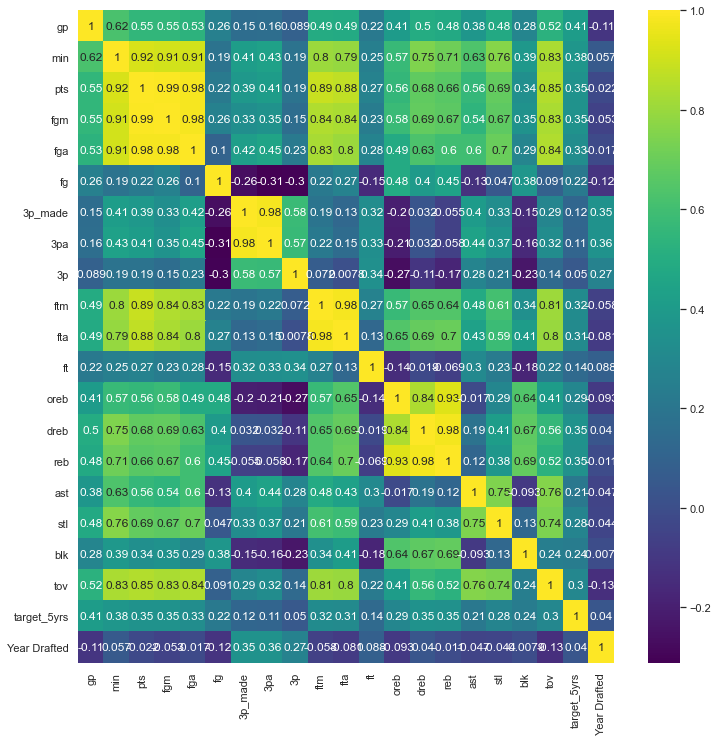

In [327]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [328]:
df.corr()['target_5yrs'].sort_values()

Year Drafted    0.039984
3p              0.050384
3pa             0.113384
3p_made         0.117835
ft              0.139435
ast             0.214056
fg              0.220020
blk             0.236490
stl             0.279787
oreb            0.292800
tov             0.296483
fta             0.312414
ftm             0.316961
fga             0.327840
reb             0.345065
fgm             0.350570
pts             0.352239
dreb            0.354961
min             0.380277
gp              0.409866
target_5yrs     1.000000
Name: target_5yrs, dtype: float64

In [329]:
df['target_5yrs'].value_counts()

1    759
0    362
Name: target_5yrs, dtype: int64

<AxesSubplot:xlabel='target_5yrs', ylabel='count'>

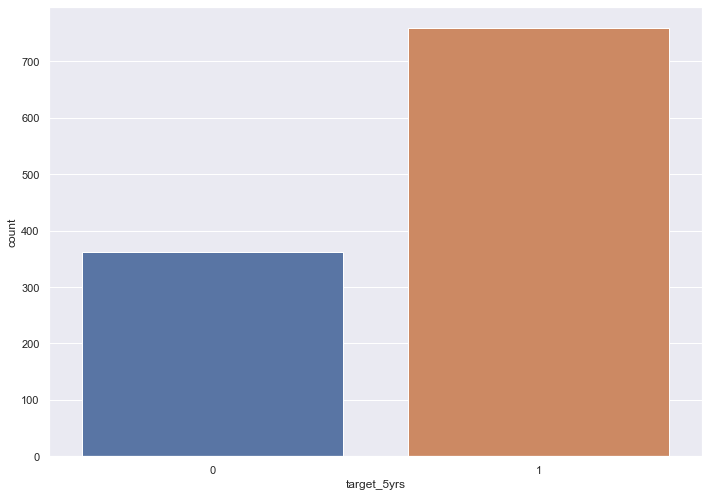

In [330]:
sns.countplot(data=df, x='target_5yrs')

## Looks like we have an imbalanced dataset...

<AxesSubplot:xlabel='gp', ylabel='pts'>

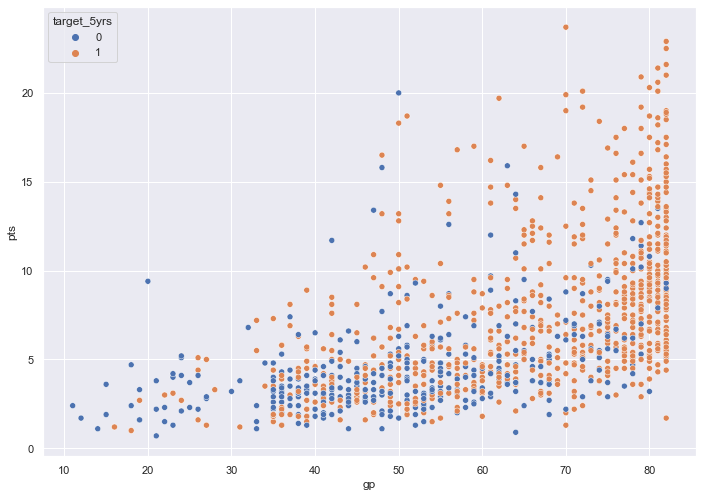

In [331]:
sns.scatterplot(x='gp', y='pts', data=df, hue='target_5yrs')

In [332]:
#sns.pairplot(df, hue='target_5yrs')

# Refining dataset with features that aren't highly correlated with each other

## Many of the features available to us are very similar and highly correlated with each other. For this reason, we will drop the others but keep one. For example, there are stats for Offensive Rebounds, Defensive Rebounds, and Rebounds (total). In this case, we will keep the Rebounds (total).

### Similarly --> FieldGoalsMade (FGM), FieldGoalAttempts(FGA), FieldGoalPercentage(FG%) --> keeping FG% even though FGM is more highly correlated with target_5yrs. We chose FG% because it is a measure of scoring efficiency while FGM is highly correlated with FGA. FGA can be explained by the role the rookie has on their team and we know that each rookie's role is different depending on the talent of the roster they are on

### 3P_made, 3PA, 3P%, --> we will keep 3P% to stay consistent in our measures of a players' scoring efficiency

### Finally... FreeThrowsMade (FTM), FreeThrowsAttempted (FTA), FreeThrowPercentage(FT) --> keep FT to maintain consistency for player's scoring efficiency

In [333]:
df.columns

Index(['name', 'gp', 'min', 'pts', 'fgm', 'fga', 'fg', '3p_made', '3pa', '3p',
       'ftm', 'fta', 'ft', 'oreb', 'dreb', 'reb', 'ast', 'stl', 'blk', 'tov',
       'target_5yrs', 'Year Drafted'],
      dtype='object')

In [334]:
df = df.drop(['name','fgm','fga','3p_made','3pa','ftm','fta','oreb','dreb'], axis=1)

In [335]:
df

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,Year Drafted
98,57,11.2,4.1,51.3,0.0,66.7,3.7,0.9,0.2,0.5,0.7,1,2012
99,52,13.3,2.3,40.7,39.3,100.0,1.5,0.8,0.3,0.2,0.4,0,2012
100,41,9.9,2.9,37.5,28.0,72.4,0.9,0.6,0.4,0.1,0.5,0,2012
101,81,25.4,9.2,43.9,35.9,75.8,4.1,1.2,0.6,0.2,1.3,1,2012
102,78,17.0,7.1,41.7,38.6,90.9,1.2,2.8,0.5,0.0,0.9,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,79,21.7,10.2,49.9,0.0,66.3,4.5,1.0,0.6,0.6,1.6,0,1980
1322,59,10.1,3.2,45.4,0.0,56.4,1.0,1.2,0.6,0.1,1.3,0,1980
1324,40,11.5,1.8,32.7,0.0,55.6,0.9,1.4,0.5,0.1,0.9,0,1980
1326,82,17.9,8.1,51.1,23.5,89.9,1.6,2.0,0.9,0.1,1.2,1,1980


<AxesSubplot:>

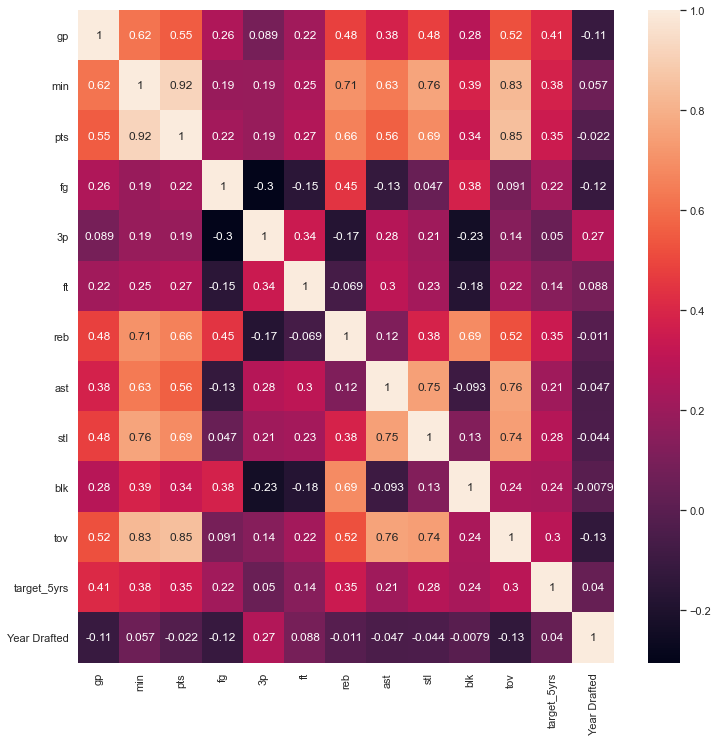

In [336]:
# new heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [337]:
df.corr()['target_5yrs'].sort_values()

Year Drafted    0.039984
3p              0.050384
ft              0.139435
ast             0.214056
fg              0.220020
blk             0.236490
stl             0.279787
tov             0.296483
reb             0.345065
pts             0.352239
min             0.380277
gp              0.409866
target_5yrs     1.000000
Name: target_5yrs, dtype: float64

# Model 1 - Baseline Logistic Regression

### Using one feature --> field goal percentage

In [338]:
X = df[['fg']]
y = df['target_5yrs']

In [339]:
X

,fg
98,51.3
99,40.7
100,37.5
101,43.9
102,41.7
...,...
1321,49.9
1322,45.4
1324,32.7
1326,51.1


In [340]:
y

98      1
99      0
100     0
101     1
102     1
       ..
1321    0
1322    0
1324    0
1326    1
1327    1
Name: target_5yrs, Length: 1121, dtype: int64

## Train | Test Split and Scaling

## Note: Splitting into training, validation, and test set
## Test set will be used at the very end of our modeling process and fit to our best performing model

In [341]:
from sklearn.model_selection import train_test_split

# first, split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# splitting the training data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [342]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

## Model 1 - Logistic Regression Model (one feature)

In [343]:
from sklearn.linear_model import LogisticRegression

In [344]:
# base model --> default parameters
log_model = LogisticRegression()

# fit training data
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [345]:
log_model.coef_

array([[0.57355522]])

This means:
* We can expect the **odds** of the rookie's career being over 5 years to **increase** (the original coeff was negative) per unit increase of games played.
* We can expect the **odds** of the rookie's career being over 5 years to **decrease** (the original coeff was negative) per unit increase of games played
*

In [346]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [347]:
y_pred = log_model.predict(scaled_X_val)

In [348]:
accuracy_score(y_val,y_pred)

0.6875

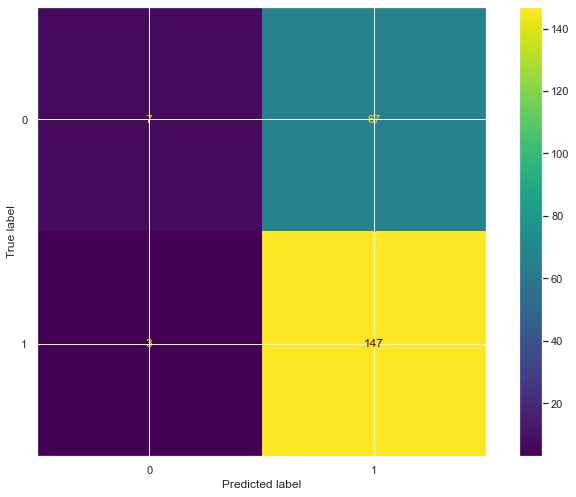

In [349]:
plot_confusion_matrix(log_model, scaled_X_val, y_val)

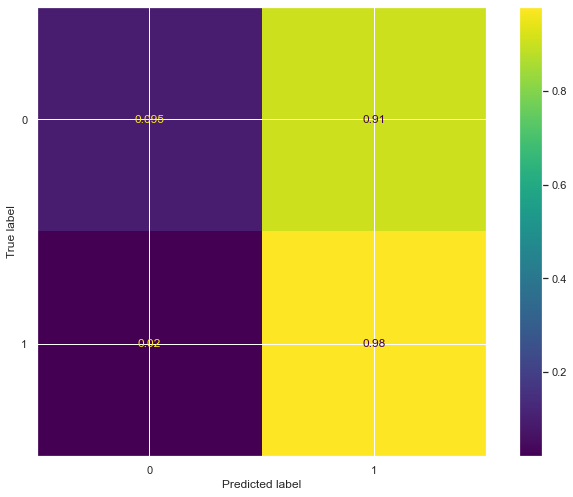

In [350]:
plot_confusion_matrix(log_model, scaled_X_val, y_val,normalize='true')

In [351]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.09      0.17        74
           1       0.69      0.98      0.81       150

    accuracy                           0.69       224
   macro avg       0.69      0.54      0.49       224
weighted avg       0.69      0.69      0.60       224



### Evaluating AUC

In [352]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

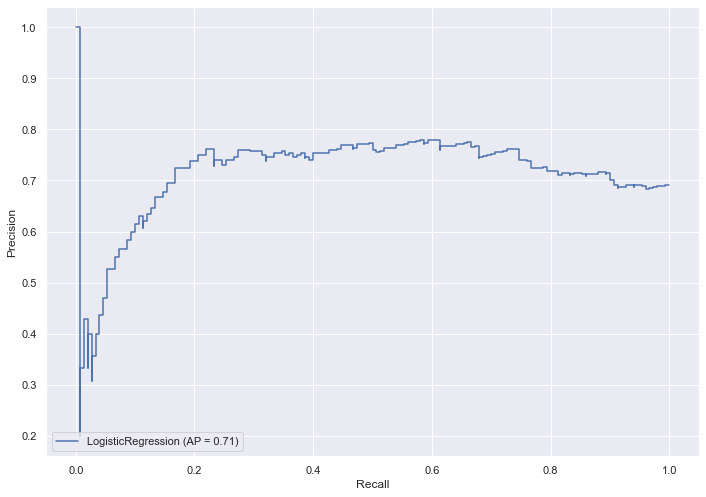

In [353]:
plot_precision_recall_curve(log_model, scaled_X_val, y_val )

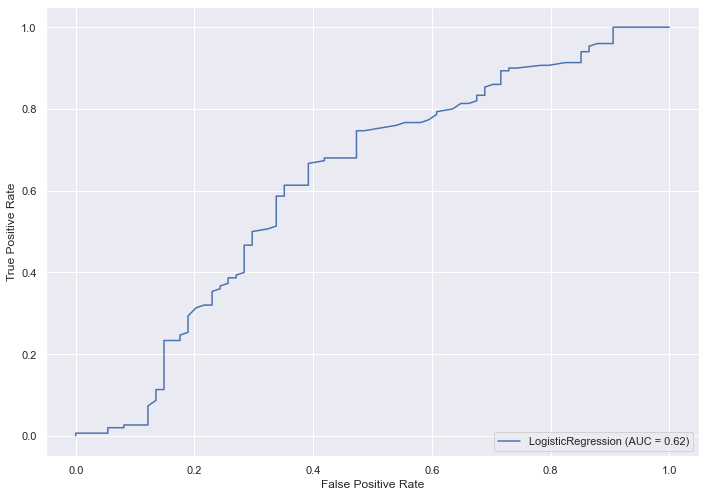

In [354]:
plot_roc_curve(log_model,scaled_X_val,y_val)

# Model 2 - Baseline Decision Tree (one feature)

In [355]:
# default parameters
from sklearn.tree import DecisionTreeClassifier

base_tree = DecisionTreeClassifier()

In [356]:
base_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [357]:
# predictions
tree_preds = base_tree.predict(X_val)

### Tree Evaluation

In [358]:
print(classification_report(y_val, tree_preds))

              precision    recall  f1-score   support

           0       0.36      0.32      0.34        74
           1       0.68      0.72      0.70       150

    accuracy                           0.59       224
   macro avg       0.52      0.52      0.52       224
weighted avg       0.58      0.59      0.58       224



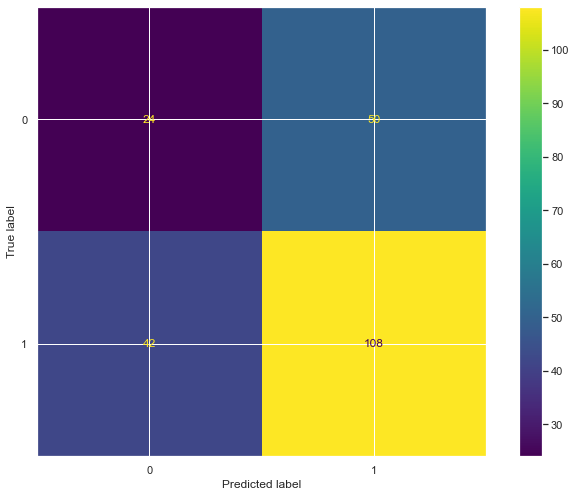

In [359]:
plot_confusion_matrix(base_tree, X_val, y_val)

# Getting back all features for future model deployment

In [360]:
df2 = pd.read_csv('Dataset/nba.csv', index_col=0)
df2

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs,Year Drafted
0,Isaiah Whitehead,25,22.6,6.7,2.6,6.4,41.3,0.5,1.8,28.3,...,76.7,0.2,2.0,2.2,3.0,0.7,0.5,2.2,0,2016
1,Kris Dunn,33,16.9,4.1,1.5,4.1,37.3,0.3,0.9,29.0,...,62.5,0.4,1.9,2.2,2.4,1.0,0.3,1.2,0,2016
2,Rodney McGruder,30,25.7,5.8,2.1,5.3,40.0,0.8,2.6,32.5,...,72.4,1.5,2.0,3.5,1.5,0.7,0.3,0.7,0,2016
3,Malcolm Brogdon,32,22.9,8.3,3.2,6.9,46.2,0.9,2.1,44.1,...,85.7,0.4,2.1,2.5,3.6,1.0,0.1,1.5,0,2016
4,Malcolm Delaney,33,16.4,5.3,2.0,5.3,37.1,0.2,1.4,17.4,...,86.0,0.2,1.5,1.6,2.8,0.4,0.0,1.5,0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,Larry Drew,76,20.8,6.6,2.6,6.4,40.7,0.1,0.2,23.5,...,79.7,0.3,1.3,1.6,3.3,1.2,0.1,2.2,0,1980
1324,John Duren,40,11.5,1.8,0.8,2.5,32.7,0.0,0.0,0.0,...,55.6,0.2,0.7,0.9,1.4,0.5,0.1,0.9,0,1980
1325,Larry Drew,76,20.8,6.6,2.6,6.4,40.7,0.1,0.2,23.5,...,79.7,0.3,1.3,1.6,3.3,1.2,0.1,2.2,1,1980
1326,Kyle Macy,82,17.9,8.1,3.3,6.5,51.1,0.1,0.6,23.5,...,89.9,0.5,1.1,1.6,2.0,0.9,0.1,1.2,1,1980


In [361]:
duplicates = df2[df2['name'].duplicated()]
duplicates

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs,Year Drafted
119,Jeff Taylor,44,17.6,3.6,1.5,3.6,40.0,0.0,0.0,0.0,...,65.2,0.6,1.2,1.8,2.5,0.9,0.3,1.4,0,2012
225,James Johnson,65,11.6,3.9,1.5,3.2,45.2,0.2,0.7,32.6,...,72.9,0.5,1.4,2.0,0.7,0.3,0.7,0.9,1,2009
227,Gerald Henderson,43,8.3,2.6,0.9,2.4,35.6,0.1,0.4,21.1,...,74.5,0.3,0.9,1.3,0.3,0.2,0.2,0.3,1,2009
312,Marcus Williams,79,16.6,6.8,2.6,6.7,39.5,0.6,2.1,28.2,...,84.7,0.4,1.7,2.1,3.3,0.4,0.0,1.8,0,2006
313,Dee Brown,49,9.2,1.9,0.7,2.0,32.7,0.1,0.6,21.4,...,64.9,0.2,0.7,0.8,1.7,0.5,0.1,0.6,0,2006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,Jeff Taylor,77,19.6,6.1,2.2,5.2,43.1,0.7,2.0,34.4,...,72.8,0.7,1.3,1.9,0.8,0.6,0.2,0.6,0,1982
1211,Jeff Taylor,44,17.6,3.6,1.5,3.6,40.0,0.0,0.0,0.0,...,65.2,0.6,1.2,1.8,2.5,0.9,0.3,1.4,0,1982
1227,Walker Russell,68,11.1,2.7,1.0,2.7,36.4,0.0,0.3,11.1,...,81.0,0.3,0.8,1.1,1.9,0.2,0.0,1.4,0,1982
1284,Eddie Johnson,74,20.5,9.3,4.0,8.7,45.9,0.0,0.1,9.1,...,66.4,1.7,2.6,4.4,1.5,0.7,0.2,1.3,1,1981


In [362]:
# dropping duplicate names
df2.drop_duplicates(subset='name', keep=False, inplace=True)

In [363]:
# removing rookies drafted after 2012 season
df2 = df2[df2['Year Drafted'] < 2013]
df2

,name,gp,min,pts,fgm,fga,fg,3p_made,3pa,3p,...,ft,oreb,dreb,reb,ast,stl,blk,tov,target_5yrs,Year Drafted
98,Kyle O'Quinn,57,11.2,4.1,1.8,3.5,51.3,0.0,0.0,0.0,...,66.7,1.1,2.5,3.7,0.9,0.2,0.5,0.7,1,2012
99,Darius Miller,52,13.3,2.3,0.8,2.1,40.7,0.4,1.1,39.3,...,100.0,0.2,1.3,1.5,0.8,0.3,0.2,0.4,0,2012
100,Kim English,41,9.9,2.9,1.0,2.7,37.5,0.3,1.2,28.0,...,72.4,0.2,0.7,0.9,0.6,0.4,0.1,0.5,0,2012
101,Harrison Barnes,81,25.4,9.2,3.4,7.8,43.9,0.6,1.8,35.9,...,75.8,0.7,3.5,4.1,1.2,0.6,0.2,1.3,1,2012
102,Brian Roberts,78,17.0,7.1,2.7,6.6,41.7,0.8,2.0,38.6,...,90.9,0.2,1.0,1.2,2.8,0.5,0.0,0.9,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1321,Reggie Johnson,79,21.7,10.2,4.3,8.6,49.9,0.0,0.0,0.0,...,66.3,1.7,2.9,4.5,1.0,0.6,0.6,1.6,0,1980
1322,Billy Reid,59,10.1,3.2,1.4,3.1,45.4,0.0,0.1,0.0,...,56.4,0.5,0.6,1.0,1.2,0.6,0.1,1.3,0,1980
1324,John Duren,40,11.5,1.8,0.8,2.5,32.7,0.0,0.0,0.0,...,55.6,0.2,0.7,0.9,1.4,0.5,0.1,0.9,0,1980
1326,Kyle Macy,82,17.9,8.1,3.3,6.5,51.1,0.1,0.6,23.5,...,89.9,0.5,1.1,1.6,2.0,0.9,0.1,1.2,1,1980


In [364]:
# dropping irrelevant columns
df2.drop(['name','fgm','fga','fga','3p_made','3pa','ftm','fta','oreb','dreb','Year Drafted'], axis=1, inplace=True)

In [365]:
df2.head()

,gp,min,pts,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs
98,57,11.2,4.1,51.3,0.0,66.7,3.7,0.9,0.2,0.5,0.7,1
99,52,13.3,2.3,40.7,39.3,100.0,1.5,0.8,0.3,0.2,0.4,0
100,41,9.9,2.9,37.5,28.0,72.4,0.9,0.6,0.4,0.1,0.5,0
101,81,25.4,9.2,43.9,35.9,75.8,4.1,1.2,0.6,0.2,1.3,1
102,78,17.0,7.1,41.7,38.6,90.9,1.2,2.8,0.5,0.0,0.9,1


In [366]:
# splitting into X and y
X = df2.drop('target_5yrs', axis=1)
y = df2['target_5yrs']

# new train_test_split
# first, split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# splitting the training data into training and validation data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [367]:
# scaling new data
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

# Model 3 - LogisticRegressionCV

In [368]:
from sklearn.linear_model import LogisticRegressionCV

In [369]:
log_model_cv = LogisticRegressionCV()

In [370]:
log_model_cv.fit(scaled_X_train, y_train)

LogisticRegressionCV()

In [371]:
# check out the C values
log_model_cv.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [372]:
# which C value is best
log_model_cv.C_

array([21.5443469])

In [373]:
log_model_cv.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

In [374]:
log_model_cv.coef_

array([[ 0.49688603, -0.87890668,  0.48980778,  0.24003446,  0.25112232,
         0.13557151,  1.06457721,  0.55456582,  0.27948512,  0.31961895,
        -0.37166063]])

### Feature Importances

In [375]:
log_model_cv_coefs = pd.Series(index=X_train.columns, data=log_model_cv.coef_[0])
log_model_cv_coefs

gp     0.496886
min   -0.878907
pts    0.489808
fg     0.240034
3p     0.251122
ft     0.135572
reb    1.064577
ast    0.554566
stl    0.279485
blk    0.319619
tov   -0.371661
dtype: float64

<AxesSubplot:>

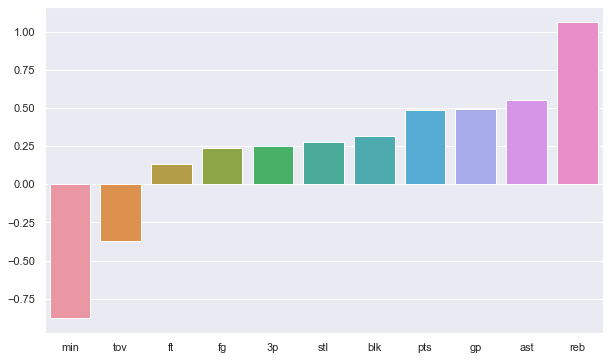

In [376]:
plt.figure(figsize=(10,6))
log_model_cv_coefs = log_model_cv_coefs.sort_values()
sns.barplot(x=log_model_cv_coefs.index, y=log_model_cv_coefs.values)

# Model 4 - K-Nearest Neighbors

### Using Pipeline object

In [377]:
# import KNN
from sklearn.neighbors import KNeighborsClassifier

# scaler object
scaler = StandardScaler()
knn = KNeighborsClassifier()

# operations
operations = [('scaler', scaler), ('knn', knn)]

# import pipeline object
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

# grid search CV
from sklearn.model_selection import GridSearchCV

In [378]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

### Using Grid Search with the pipeline to test different values of K and reporting back the best performing parameters

In [379]:

# k values
k_values = list(range(1,35))

# parameter grid
param_grid = {'knn__n_neighbors': k_values}

# full classifer
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [380]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30, ...]},
             scoring='accuracy')

In [381]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=23))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=23),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 23,
 'knn__p': 2,
 'knn__weights': 'uniform'}

Text(0, 0.5, 'Accuracy')

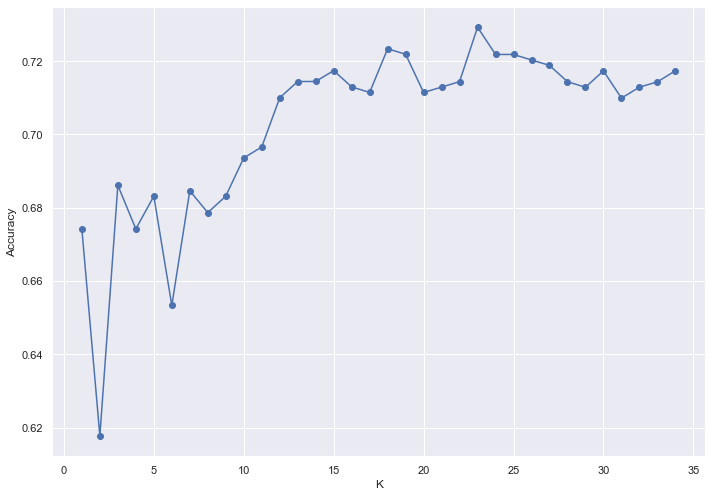

In [382]:
# plot for mean test scores per each K value
# full_cv_classifier.cv_results_['mean_test_score']

scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

### KNN Model Evaluation

In [383]:
def model_predictions(model, X_val=scaled_X_val):
    predictions = model.predict(X_val)
    return predictions

In [384]:
knn_21 = KNeighborsClassifier(n_neighbors=23)
knn_21.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [385]:
model_predictions(knn_21, scaled_X_val)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1], dtype=int64)

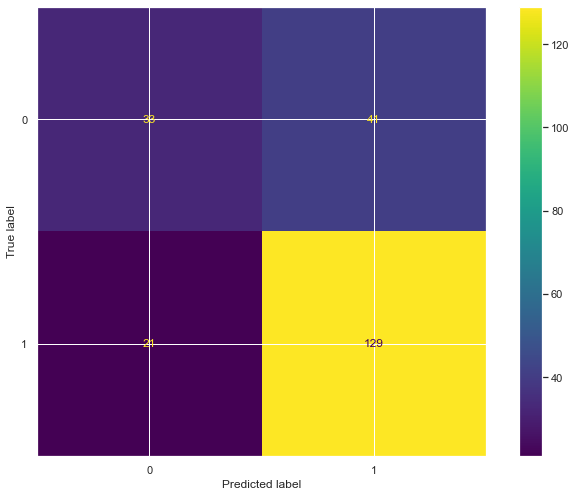

In [386]:
plot_confusion_matrix(knn_21, scaled_X_val, y_val)

In [387]:
print(classification_report(y_val, model_predictions(knn_21, scaled_X_val)))

              precision    recall  f1-score   support

           0       0.61      0.45      0.52        74
           1       0.76      0.86      0.81       150

    accuracy                           0.72       224
   macro avg       0.68      0.65      0.66       224
weighted avg       0.71      0.72      0.71       224



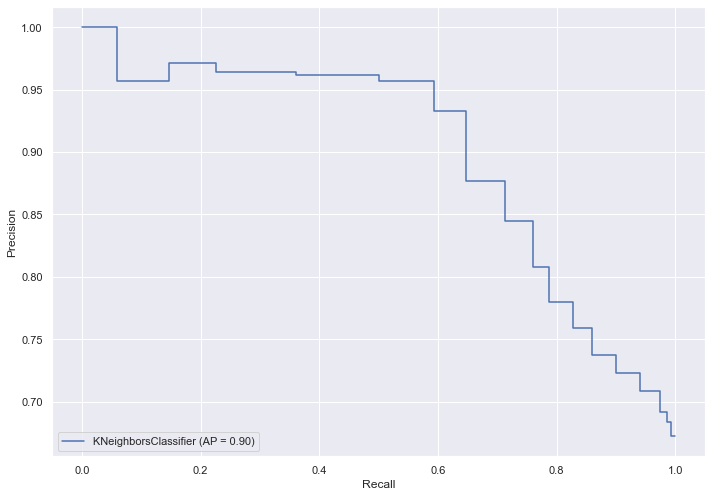

In [388]:
plot_precision_recall_curve(knn_21, scaled_X_val, y_val )

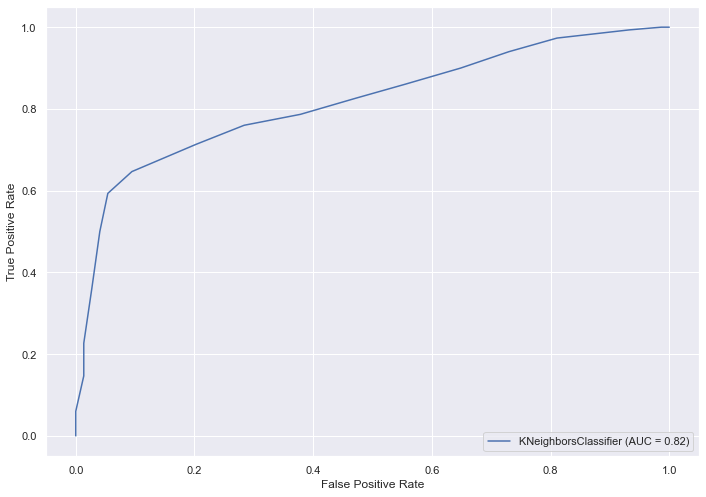

In [389]:
plot_roc_curve(knn_21,scaled_X_val,y_val)

# Model 5 - Random Forest Classification

In [390]:
from sklearn.ensemble import RandomForestClassifier

In [391]:
rfc = RandomForestClassifier(n_estimators=10, max_features='auto',
                            random_state=24)

In [392]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=24)

In [393]:
rfc_preds = rfc.predict(X_val)

### Forest Evaluation

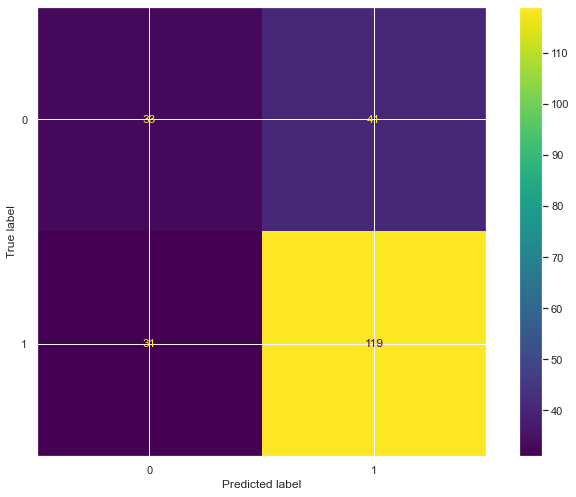

In [394]:
plot_confusion_matrix(rfc, X_val, y_val)

In [395]:
print(classification_report(y_val, rfc_preds))

              precision    recall  f1-score   support

           0       0.52      0.45      0.48        74
           1       0.74      0.79      0.77       150

    accuracy                           0.68       224
   macro avg       0.63      0.62      0.62       224
weighted avg       0.67      0.68      0.67       224



In [396]:
X.columns

Index(['gp', 'min', 'pts', 'fg', '3p', 'ft', 'reb', 'ast', 'stl', 'blk',
       'tov'],
      dtype='object')

In [397]:
rfc.feature_importances_

array([0.10957456, 0.09826293, 0.13170647, 0.12995892, 0.06951999,
       0.0946754 , 0.09796851, 0.07498603, 0.05491734, 0.07750444,
       0.06092541])

### Choosing optimal number of trees

In [398]:
test_error = []

for n in range(1,40):
    # Use n random trees
    rfc_mod = RandomForestClassifier(n_estimators=n,max_features='auto')
    rfc_mod.fit(X_train,y_train)
    val_preds = rfc_mod.predict(X_val)
    test_error.append(1-accuracy_score(val_preds,y_val))

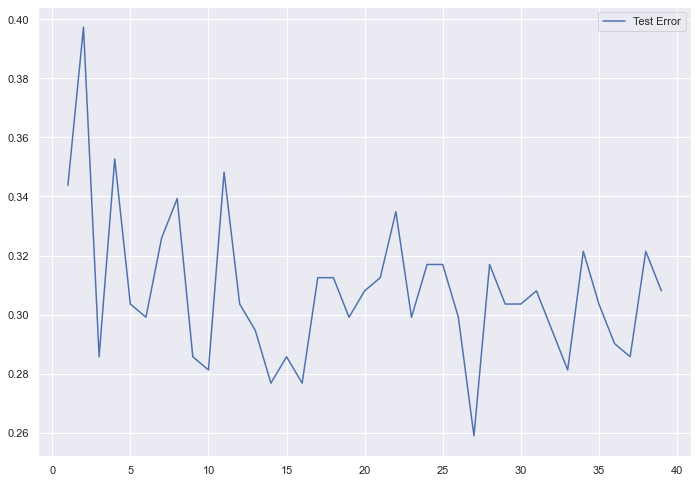

In [399]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

# Model 6 - Random Forest GridSearch

In [400]:
n_estimators=[64,100,128,200]
max_features= [2,3,4]
bootstrap = [True,False]
oob_score = [True,False]

In [401]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'bootstrap':bootstrap,
             'oob_score':oob_score}

In [402]:
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc,param_grid)

In [403]:
rfc_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [64, 100, 128, 200],
                         'oob_score': [True, False]})

In [404]:
rfc_grid.best_params_

{'bootstrap': True, 'max_features': 4, 'n_estimators': 100, 'oob_score': False}

In [405]:
rfc_preds_2 = rfc_grid.predict(X_val)

### RFC GridSearch Eval.

In [406]:
print(classification_report(y_val,rfc_preds_2))

              precision    recall  f1-score   support

           0       0.58      0.46      0.51        74
           1       0.76      0.83      0.79       150

    accuracy                           0.71       224
   macro avg       0.67      0.65      0.65       224
weighted avg       0.70      0.71      0.70       224



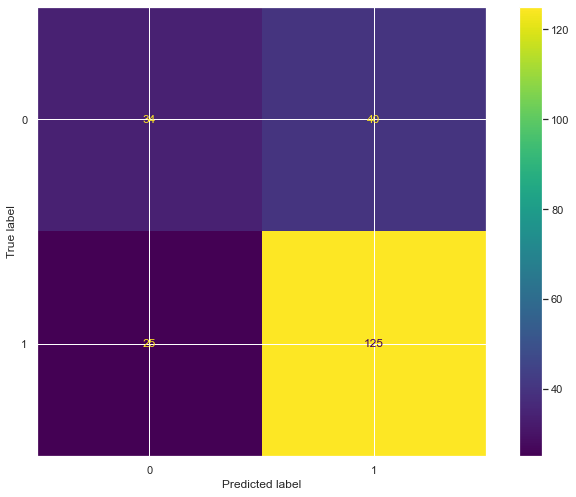

In [407]:
plot_confusion_matrix(rfc_grid, X_val, y_val)

# Model 7 - Separate RFC Model

In [408]:
rfc_3 = RandomForestClassifier(max_depth= 6, min_samples_leaf=1, min_samples_split=5)

In [409]:
rfc_3.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_split=5)

In [410]:
rfc_3_preds = rfc_3.predict(X_val)

In [411]:
print(classification_report(y_val,rfc_3_preds))

              precision    recall  f1-score   support

           0       0.52      0.39      0.45        74
           1       0.73      0.82      0.77       150

    accuracy                           0.68       224
   macro avg       0.62      0.61      0.61       224
weighted avg       0.66      0.68      0.67       224



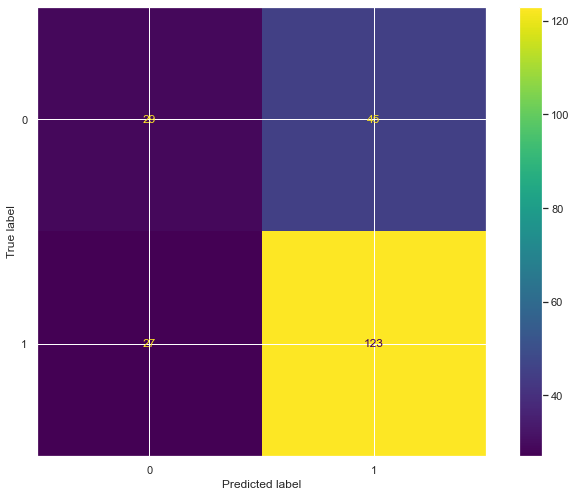

In [412]:
plot_confusion_matrix(rfc_3, X_val, y_val)

# Model 8 - Support Vector Machines (SVM)

In [413]:
# scaled data check
scaled_X_train

array([[-1.15200815, -0.04544383,  0.35331909, ..., -0.51251381,
        -0.39917338, -0.83893113],
       [-1.15200815, -0.76499539, -0.82964339, ...,  0.00931843,
        -0.65343359, -0.68990609],
       [ 0.82684024,  0.80826141,  0.15615868, ..., -0.51251381,
        -0.14491318, -0.24283098],
       ...,
       [-1.15200815, -0.74060382, -0.68177308, ..., -1.03434606,
        -0.65343359, -0.83893113],
       [-0.73225243, -0.16740172, -0.11493689, ..., -0.51251381,
        -0.14491318, -0.98795617],
       [-1.57176387, -0.56986277, -0.55854782, ..., -0.25159769,
         0.36360722, -0.98795617]])

In [414]:
scaled_X_val

array([[-0.25253161, -0.96012802, -0.82964339, ..., -0.51251381,
        -0.39917338, -1.28600624],
       [ 1.12666576,  1.6009877 ,  2.10311775, ...,  1.31389905,
        -0.65343359,  2.58864474],
       [ 0.22718921,  0.369213  ,  0.40260919, ...,  0.27023456,
        -0.90769379,  0.20424414],
       ...,
       [ 0.16722411, -0.03324804,  0.08222352, ...,  1.31389905,
        -0.65343359,  0.50229421],
       [-1.51179877, -1.48454695, -1.10073896, ..., -1.29526219,
        -0.65343359, -0.24283098],
       [ 0.16722411,  0.75947825,  0.40260919, ...,  0.00931843,
        -0.65343359, -0.39185601]])

In [415]:
# SVC instance
from sklearn.svm import SVC

# using class_weight = 'balanced' because our target class is imbalanced
svc = SVC(class_weight='balanced')

In [416]:
# use grid search to find the best parameters for SVC
param_grid_svc = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}

In [417]:
# grid instance
svc_grid = GridSearchCV(svc, param_grid_svc)

In [418]:
svc_grid.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [419]:
svc_grid.best_params_

{'C': 1, 'gamma': 'scale'}

### Performance Metrics - SVC

In [420]:
svc_preds = model_predictions(svc_grid, scaled_X_val)

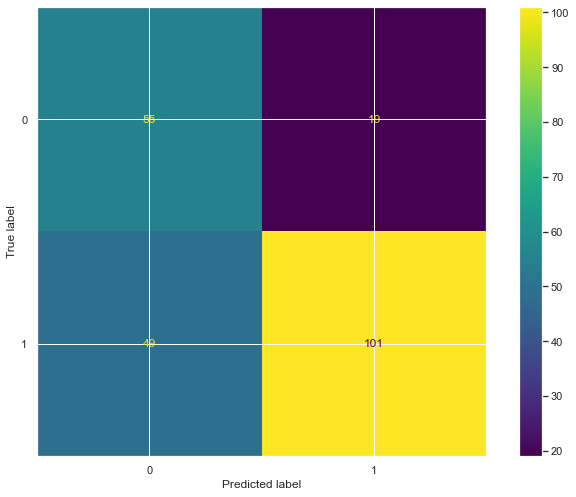

In [421]:
plot_confusion_matrix(svc_grid, scaled_X_val, y_val)

In [422]:
print(classification_report(y_val, model_predictions(knn_21, scaled_X_val)))

              precision    recall  f1-score   support

           0       0.61      0.45      0.52        74
           1       0.76      0.86      0.81       150

    accuracy                           0.72       224
   macro avg       0.68      0.65      0.66       224
weighted avg       0.71      0.72      0.71       224



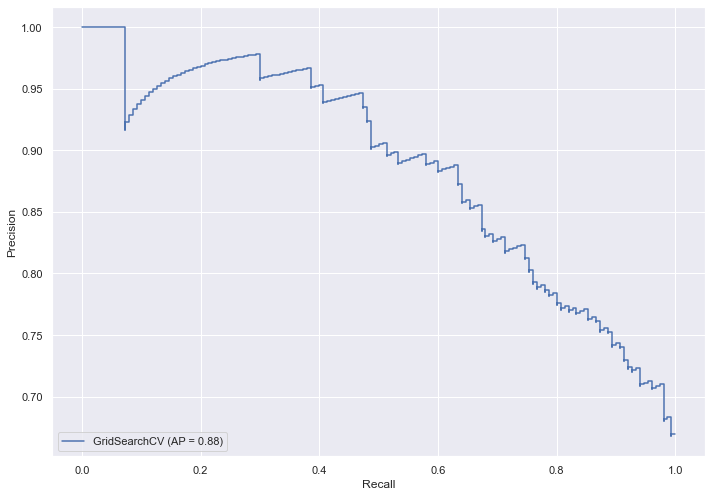

In [423]:
plot_precision_recall_curve(svc_grid, scaled_X_val, y_val )

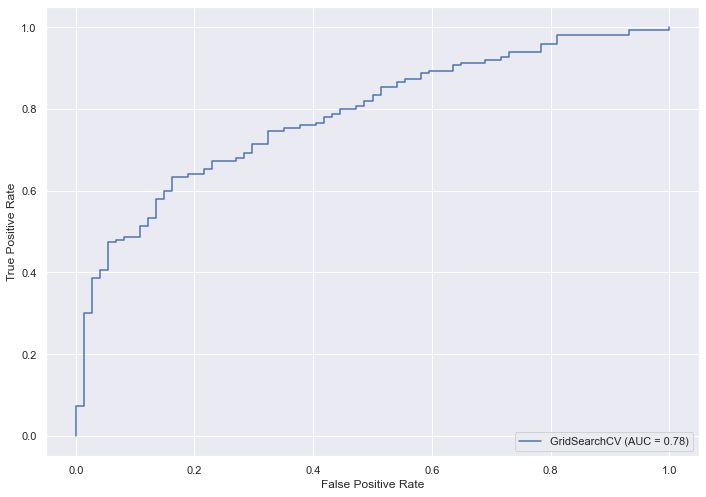

In [424]:
plot_roc_curve(svc_grid,scaled_X_val,y_val)

# Model 9 - XGBoost

In [425]:
from xgboost import XGBClassifier

In [426]:
xgb = XGBClassifier(eval_metric='logloss', eval_metric='logloss')
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [427]:
xgb_preds = xgb.predict(X_val)

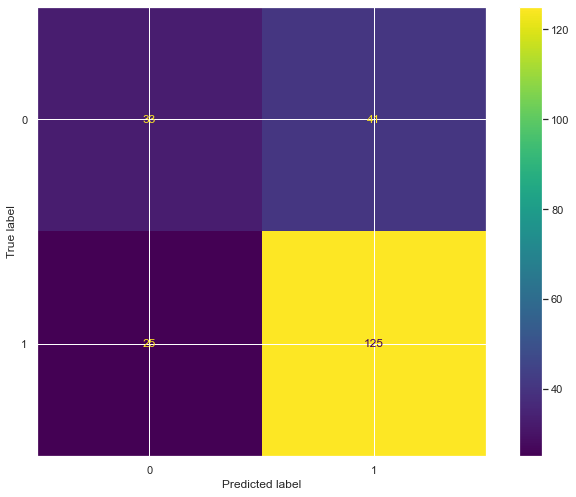

In [428]:
plot_confusion_matrix(xgb, X_val, y_val)

In [429]:
print(classification_report(y_val, xgb_preds))

              precision    recall  f1-score   support

           0       0.57      0.45      0.50        74
           1       0.75      0.83      0.79       150

    accuracy                           0.71       224
   macro avg       0.66      0.64      0.65       224
weighted avg       0.69      0.71      0.69       224



## XGBoost GridSearch

In [430]:
xgb2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [431]:
param_grid_xgb = {
    'learning_rate': [0.1, 0.2,0.3,0.4,0.5],
    'max_depth': [1,2,3,4,5],
    'min_child_weight': [1, 2,3,4,5],
    'subsample': [0.5, 0.7],
    'n_estimators': [10,50,100,200],
}

In [432]:
grid_xgb = GridSearchCV(xgb2, param_grid_xgb, scoring='accuracy',n_jobs=1)
grid_xgb.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_esti...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                  

In [433]:
grid_xgb.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'min_child_weight': 4,
 'n_estimators': 50,
 'subsample': 0.7}

In [434]:
grid_xgb_preds = grid_xgb.predict(X_val)

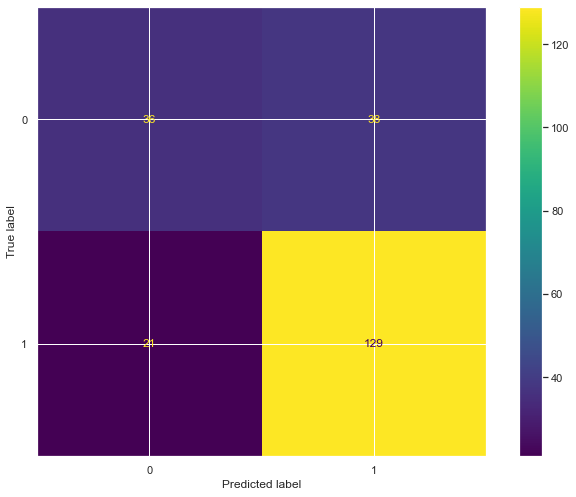

In [435]:
plot_confusion_matrix(grid_xgb, X_val, y_val)

In [436]:
print(classification_report(y_val, grid_xgb_preds))

              precision    recall  f1-score   support

           0       0.63      0.49      0.55        74
           1       0.77      0.86      0.81       150

    accuracy                           0.74       224
   macro avg       0.70      0.67      0.68       224
weighted avg       0.73      0.74      0.73       224



### XGBoost GridSearch Curves

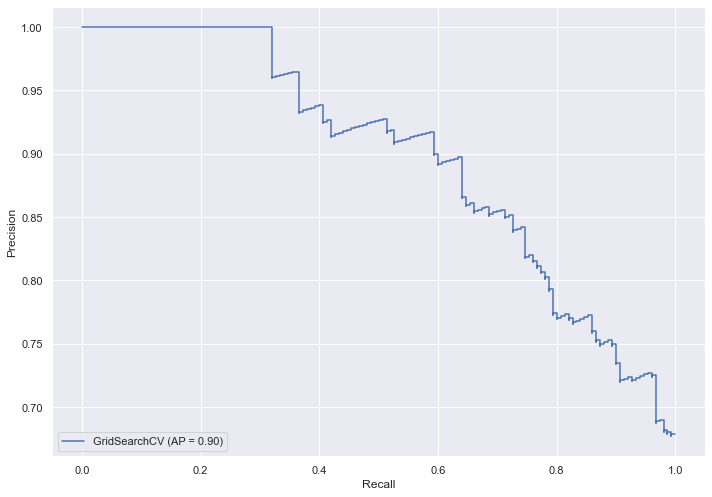

In [437]:
plot_precision_recall_curve(grid_xgb, X_val, y_val )

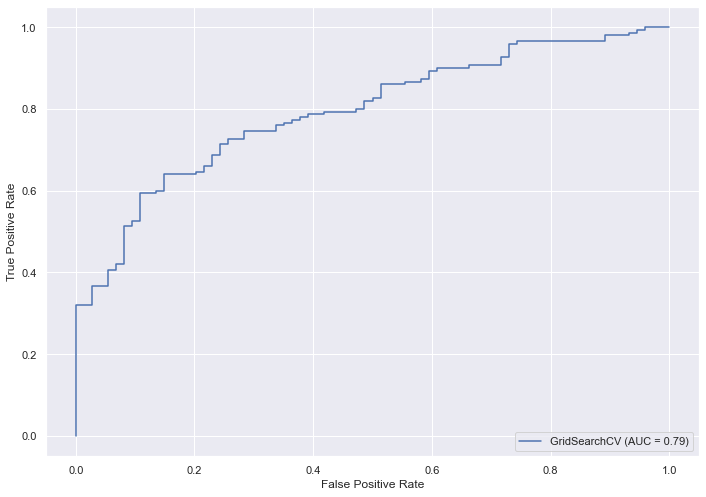

In [438]:
plot_roc_curve(grid_xgb,X_val,y_val)

# Model 10 - Complex Log Reg

In [439]:
logreg = LogisticRegression()

# hyper parameters
penalty = ['l1','l2','elasticnet']
C = np.linspace(0,4,10)
solver=['newton-cg','lbfgs','liblinear','sag','saga']
max_iter = [10,50,100]

param_grid = dict(penalty=penalty, C=C, solver=solver, max_iter=max_iter)
param_grid

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': array([0.        , 0.44444444, 0.88888889, 1.33333333, 1.77777778,
        2.22222222, 2.66666667, 3.11111111, 3.55555556, 4.        ]),
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': [10, 50, 100]}

In [440]:
logreg_grid = GridSearchCV(logreg, param_grid, scoring='accuracy',cv=5)

In [441]:
logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.        , 0.44444444, 0.88888889, 1.33333333, 1.77777778,
       2.22222222, 2.66666667, 3.11111111, 3.55555556, 4.        ]),
                         'max_iter': [10, 50, 100],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [442]:
logreg_grid.best_params_

{'C': 3.5555555555555554,
 'max_iter': 50,
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [443]:
logreg_grid_preds = logreg_grid.predict(X_val)

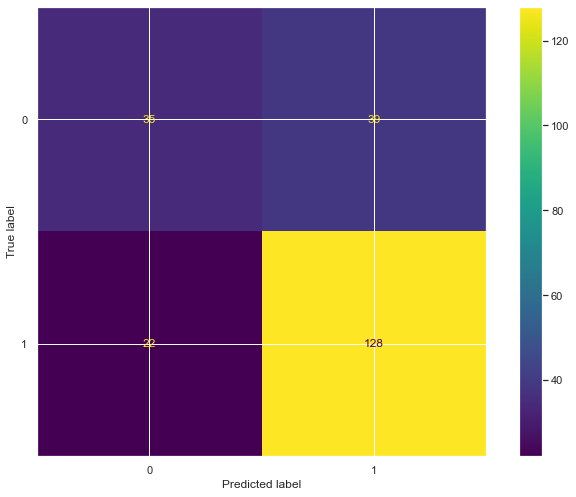

In [444]:
plot_confusion_matrix(logreg_grid, X_val, y_val)

In [445]:
print(classification_report(y_val, logreg_grid_preds))

              precision    recall  f1-score   support

           0       0.61      0.47      0.53        74
           1       0.77      0.85      0.81       150

    accuracy                           0.73       224
   macro avg       0.69      0.66      0.67       224
weighted avg       0.72      0.73      0.72       224



### Complex Log Reg Curves

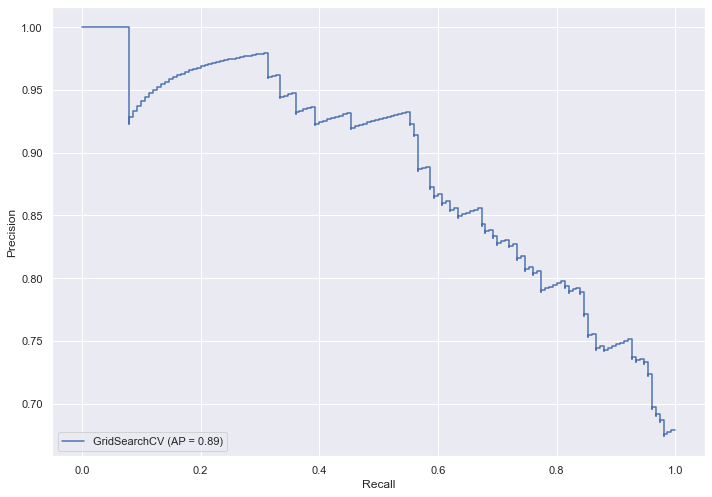

In [446]:
plot_precision_recall_curve(logreg_grid, X_val, y_val)

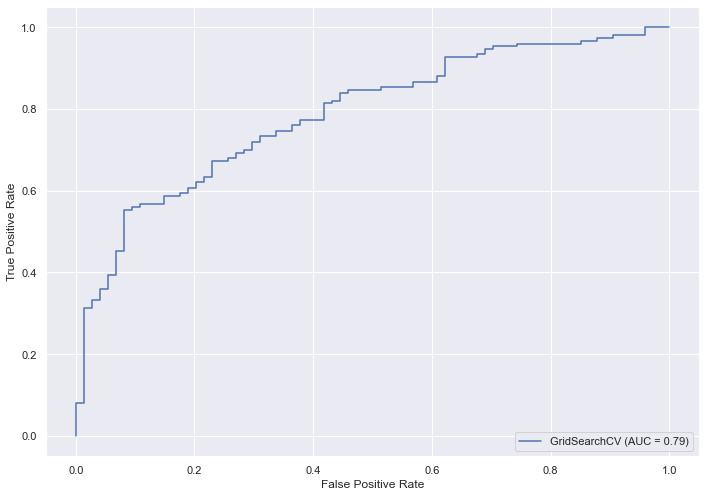

In [447]:
plot_roc_curve(logreg_grid,X_val,y_val)

# Model 11 - Final XGBoost

In [448]:
final_xgb = XGBClassifier(learning_rate=0.1,max_depth=2,min_child_weight=4,n_estimators=50,subsample=0.7, eval_metric='logloss')

In [449]:
final_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=2, min_child_weight=4, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [450]:
final_xgb_preds = final_xgb.predict(X_test)

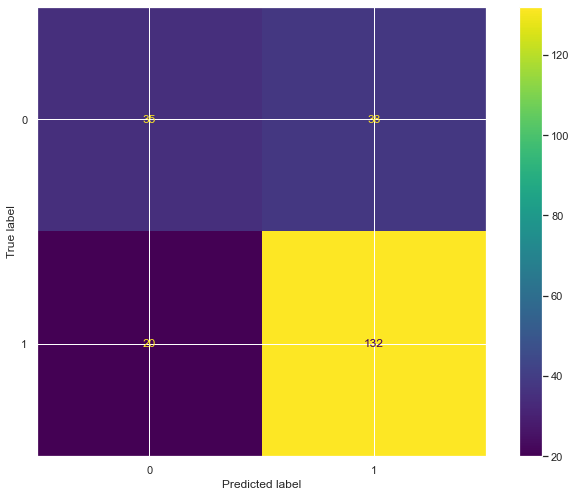

In [451]:
plot_confusion_matrix(final_xgb, X_test, y_test)

In [452]:
print(classification_report(y_test, final_xgb_preds))

              precision    recall  f1-score   support

           0       0.64      0.48      0.55        73
           1       0.78      0.87      0.82       152

    accuracy                           0.74       225
   macro avg       0.71      0.67      0.68       225
weighted avg       0.73      0.74      0.73       225



In [453]:
final_xgb.feature_importances_

array([0.12009299, 0.06165596, 0.22064096, 0.08261852, 0.04633751,
       0.06725453, 0.14476672, 0.04652404, 0.04832054, 0.10656809,
       0.05522012], dtype=float32)

<AxesSubplot:>

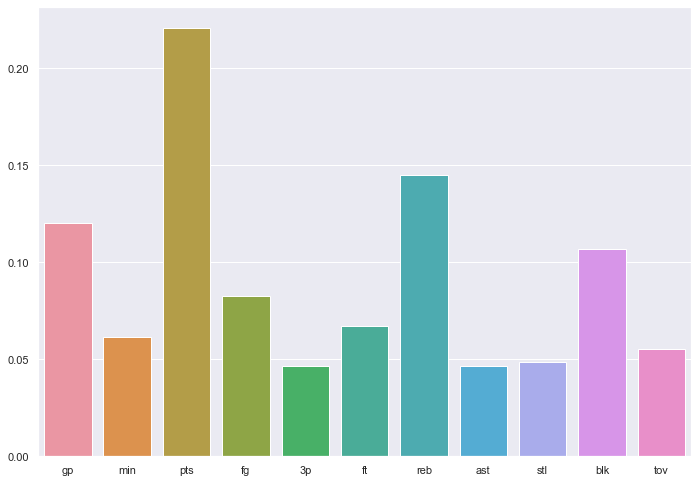

In [454]:
sns.barplot(x=X_train.columns, y=final_xgb.feature_importances_)

In [455]:
# sorted barchart
feature_importances = final_xgb.feature_importances_
features = X_train.columns

feature_df = pd.DataFrame({'Feature Name':features, 'Feature Importance':feature_importances})

feature_df

,Feature Name,Feature Importance
0,gp,0.120093
1,min,0.061656
2,pts,0.220641
3,fg,0.082619
4,3p,0.046338
5,ft,0.067255
6,reb,0.144767
7,ast,0.046524
8,stl,0.048321
9,blk,0.106568


In [456]:
feature_df.sort_values(by='Feature Importance', ascending=False)

,Feature Name,Feature Importance
2,pts,0.220641
6,reb,0.144767
0,gp,0.120093
9,blk,0.106568
3,fg,0.082619
5,ft,0.067255
1,min,0.061656
10,tov,0.055220
8,stl,0.048321
7,ast,0.046524


''

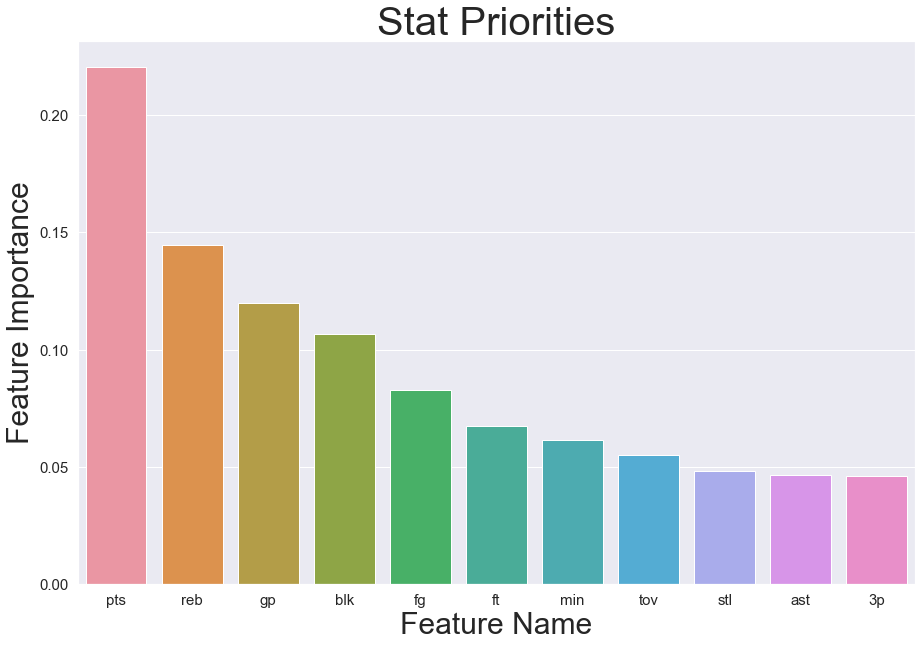

In [457]:
ascending_features = feature_df.sort_values(by='Feature Importance', ascending=False)

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='Feature Name', y='Feature Importance', data=ascending_features)
# sns.set(rc={'figure.figsize':(15,18)})
ax.set_xlabel('Feature Name', fontsize = 30)
ax.set_ylabel('Feature Importance', fontsize = 30)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
ax.set_title('Stat Priorities', fontsize = 40)
;

In [168]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

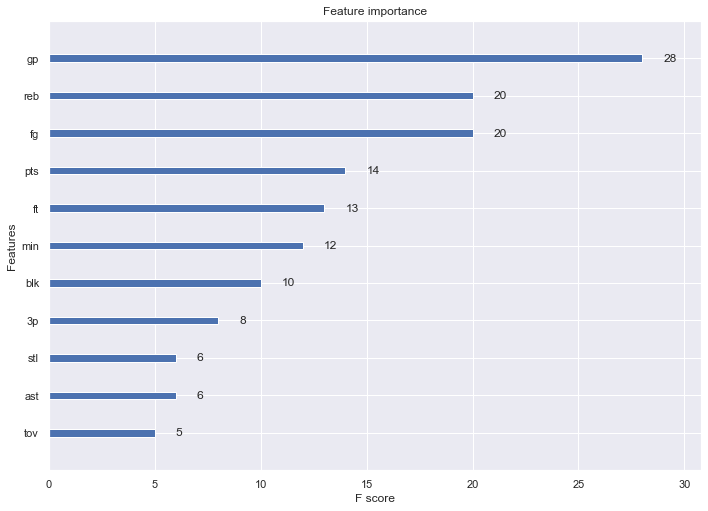

In [459]:
plot_importance(final_xgb)
plt.show()